In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import mean_absolute_error as mae

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv')

df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


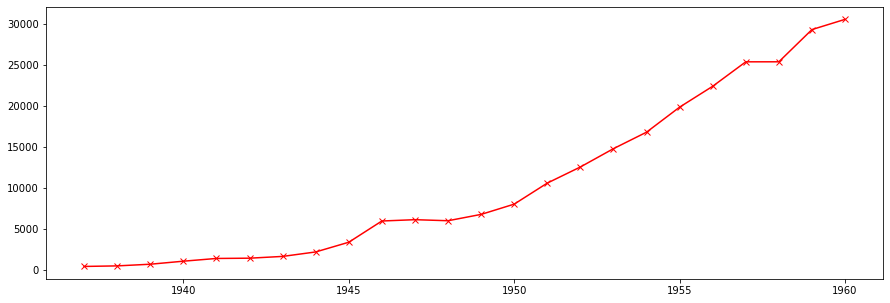

In [4]:
plt.figure(figsize=(15, 5))
plt.plot( df.time, df.airmiles, 'x-', c='r' );
#to o  - nie zero oznacza, ze  kropki (w miejscu zera moze byc x) maja  byc widoczne, a minus, ze tez linie laczace

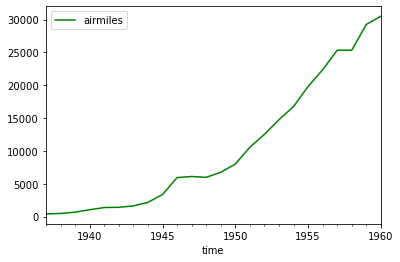

In [5]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv'
df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df[['airmiles'] ].plot( c='g' )

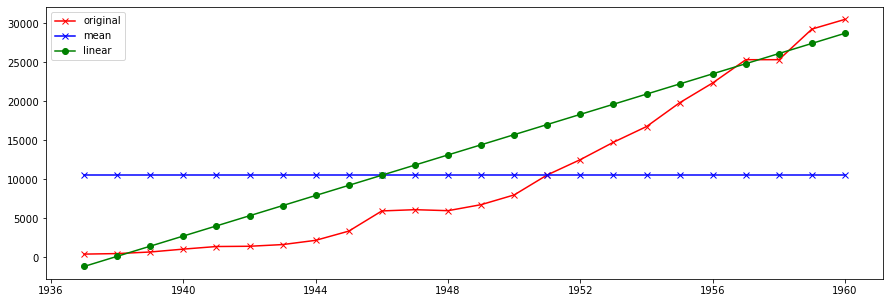

In [6]:
def linear_func(airmiles, k=None, b=0): 
    mean_value = np.mean(airmiles)
    if k is None:
        return[mean_value] * len(airmiles)
    
    return[idx*k+b for idx, _ in enumerate(airmiles)]
    
    
    
#funkcja dostaje airmiles, liczy wartosc srednia -mean value
#nastepnie zwraca tablice wartosci srednich [mean_value]
# dla kazdej wartosci zwracamy taka obliczona wartosc  srednia - * len(airmiles) 
plt.figure(figsize=(15, 5))
plt.plot( df.index, df.airmiles, 'x-', c='r', label='original');
plt.plot( df.index, linear_func(df.airmiles), 'x-', c='b', label='mean');
plt.plot( df.index, linear_func(df.airmiles, k=1300, b=-1170), 'o-', c='g', label='linear');

plt.legend();

# Metryka sukcesu

In [53]:
print('mean', mae( df.airmiles, linear_func(df.airmiles) ))
print('linear', mae( df.airmiles, linear_func(df.airmiles,  k=1000, b=-1199) ))

mean 8499.305555555557
linear 3114.75
